In [ ]:
'''

Name: Arvind Devkate
Roll Number: 220215
IITK Email: arvindd22@iitk.ac.in

3. Solve this competition (use logisitic regression): https://www.kaggle.com/t/6ac9ca8159f64c4eb794206a735a61ca
'''


In [ ]:
import pandas as pd
import numpy as np
from google.colab import files


In [ ]:
uploaded=files.upload()
df=pd.read_csv('train.csv')

Saving train.csv to train (2).csv


In [ ]:
df.fillna(0,inplace=True)
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
# df_2=df.dropna()
# df_2

In [ ]:
columns_to_drop= ['Name','Cabin','Destination','HomePlanet']
df = df.drop(columns=columns_to_drop)

In [ ]:
df['Transported'] = df['Transported'].astype(int)
df['VIP'] = df['VIP'].astype(int)
df['CryoSleep'] = df['CryoSleep'].astype(int)
df

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0
8689,9278_01,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0
8690,9279_01,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1
8691,9280_01,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0


In [ ]:
#Multi- Logistic Regression Model
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split


#add x,y variable column
X_features=df.columns[1:9]
X= sm.add_constant(df[X_features])
Y=df['Transported']

#fitting data set
train_X,test_X, train_Y, test_Y= train_test_split(X,Y,
                                                  train_size=0.8,
                                                  random_state=42)


logit = sm.Logit(Y,X).fit()
logit.summary2()

Optimization terminated successfully.
         Current function value: 0.479933
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Method:           MLE      
Dependent Variable: Transported      Pseudo R-squared: 0.308    
Date:               2024-01-07 17:39 AIC:              8362.1211
No. Observations:   8693             BIC:              8425.7535
Df Model:           8                Log-Likelihood:   -4172.1  
Df Residuals:       8684             LL-Null:          -6025.3  
Converged:          1.0000           LLR p-value:      0.0000   
No. Iterations:     8.0000           Scale:            1.0000   
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
const           -0.1590   0.0635  -2.5031 0.0123 -0.2836 -0.0345
CryoSleep        1.7074   0.0666  25.6475 0.0000  1.5769  1.8378
Age             -0.0019   0.0018  -1.0117 0.3117 -0.0055  0.0017
VIP              0.2457   0.2187   1.1233 0.2613 -0.1830  0.6743
RoomService     -0.0013   0.0001 -15.1786 0.0000 -0.0015 -0.0012
FoodCourt        0.0008   0.0000  19.3296 0.0000  0.0007  0.0008
ShoppingMall     0.0006   0.0001  10.2085 0.0000  0.0005  0.0007
Spa             -0.0016   0.0001 -15.9871 0.0000 -0.0018 -0.0014
VRDeck          -0.0015   0.0001 -15.8037 0.0000 -0.0017 -0.0013
================================================================

"""

In [ ]:
pred_Y=logit.predict(test_X)
pred_Y_df=pd.DataFrame({
    "Actual": test_Y, "Actual Predicted": pred_Y, "Predicted": round(pred_Y)})
print(pred_Y_df)

      Actual  Actual Predicted  Predicted
304        1          0.161737        0.0
2697       0          0.617644        1.0
8424       0          0.813373        1.0
1672       1          0.574737        1.0
8458       1          0.812808        1.0
...      ...               ...        ...
7175       0          0.820328        1.0
3187       1          0.824671        1.0
1302       0          0.446273        0.0
5934       1          0.813091        1.0
6093       0          0.042861        0.0

[1739 rows x 3 columns]


Confusion matrix is: [[652 209]
 [194 684]]


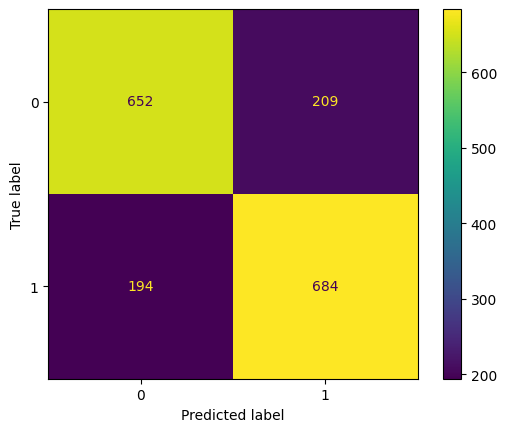

              precision    recall  f1-score   support

           0       0.77      0.76      0.76       861
           1       0.77      0.78      0.77       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739



In [ ]:
from sklearn import metrics
conf_mat= metrics.confusion_matrix( pred_Y_df["Actual"], pred_Y_df["Predicted"])
print("Confusion matrix is:", conf_mat)

#Plotting confusion matrix
cm_disp=metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat)
cm_disp.plot()
plt.show()
print(metrics.classification_report(pred_Y_df["Actual"], pred_Y_df["Predicted"]))

In [ ]:
uploaded=files.upload()
df_2=pd.read_csv('test.csv')

Saving test.csv to test (2).csv


In [ ]:
columns_to_drop= ['Name','Cabin','Destination','HomePlanet']
df_2 = df_2.drop(columns=columns_to_drop)
df_2.fillna(0,inplace=True)
df_2

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,True,27.0,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,False,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,True,31.0,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,False,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,False,20.0,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
4272,9266_02,True,34.0,False,0.0,0.0,0.0,0.0,0.0
4273,9269_01,False,42.0,False,0.0,847.0,17.0,10.0,144.0
4274,9271_01,True,0.0,False,0.0,0.0,0.0,0.0,0.0
4275,9273_01,False,0.0,False,0.0,2680.0,0.0,0.0,523.0


In [ ]:
df_2['VIP'] = df_2['VIP'].astype(int)
df_2['CryoSleep'] = df_2['CryoSleep'].astype(int)
df_2

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,1,27.0,0,0.0,0.0,0.0,0.0,0.0
1,0018_01,0,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,0019_01,1,31.0,0,0.0,0.0,0.0,0.0,0.0
3,0021_01,0,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,0023_01,0,20.0,0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,34.0,0,0.0,0.0,0.0,0.0,0.0
4273,9269_01,0,42.0,0,0.0,847.0,17.0,10.0,144.0
4274,9271_01,1,0.0,0,0.0,0.0,0.0,0.0,0.0
4275,9273_01,0,0.0,0,0.0,2680.0,0.0,0.0,523.0


In [ ]:
X_features=df_2.columns[1:9]
test_X2= sm.add_constant(df_2[X_features])

pred_Y=logit.predict(test_X2)
pred_Y_df=pd.DataFrame({
    "PassengerId":df_2['PassengerId'],
     "Predicted": round(pred_Y)})
print(pred_Y_df)



# y_pred_df=pd.DataFrame({
#     "Actual Predicted": y_pred, "Predicted": round(y_pred)})
# print(pred_Y_df)
# pred_Y=logit.predict(test_X)
# pred_Y_df=pd.DataFrame({
#     "Actual Predicted": pred_Y, "Predicted": round(pred_Y)})
# print(pred_Y_df)

     PassengerId  Predicted
0        0013_01        1.0
1        0018_01        0.0
2        0019_01        1.0
3        0021_01        1.0
4        0023_01        1.0
...          ...        ...
4272     9266_02        1.0
4273     9269_01        1.0
4274     9271_01        1.0
4275     9273_01        1.0
4276     9277_01        1.0

[4277 rows x 2 columns]


In [ ]:
pred_Y_df['Transported'] = pred_Y_df['Predicted'].map({1: True, 0: False})
pred_Y_df.drop('Predicted', axis=1, inplace=True)
pred_Y_df


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [ ]:
pred_Y_df.to_csv('name.csv', index=False)

In [ ]:
files.download('name.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>